<h1>The Roots package</h1>

<p>The <code>Roots</code> package contains simple routines for finding roots of continuous scalar functions of a single real variable.  The basic interface is through the function <code>fzero</code>, which through multiple dispatch can handle many different cases.</p>

<p>We will use these pacakges</p>

In [ ]:
using Plots
backend(:gadfly)
using Roots

<h2>Bracketing</h2>

<p>For a function &#36;f: R \rightarrow R&#36; a bracket is a pair &#36;a&lt;b&#36; for which &#36;f&#40;a&#41;\cdot f&#40;b&#41; &lt; 0&#36;. That is they have different signs. If &#36;f&#36; is continuous this forces there to be a zero on the interval &#36;&#91;a,b&#93;&#36;, otherwise, if &#36;f&#36; is only piecewise continuous, there must be a point &#36;c&#36; in &#36;&#91;a,b&#93;&#36; with the left limit and right limit at &#36;c&#36; having different signs. These values can be found, up to floating point roundoff.</p>

<p>That is, a value &#36;a &lt; c &lt; b&#36; can be found with either <code>f&#40;c&#41; &#61;&#61; 0.0</code> or <code>f&#40;prevfloat&#40;c&#41;&#41; * f&#40;nextfloat&#40;c&#41;&#41; &lt;&#61; 0</code>.</p>

<p>To illustrate, consider the function &#36;f&#40;x&#41; &#61; \cos&#40;x&#41; - x&#36;. From the graph we see readily that &#36;&#91;0,1&#93;&#36; is a bracket:</p>

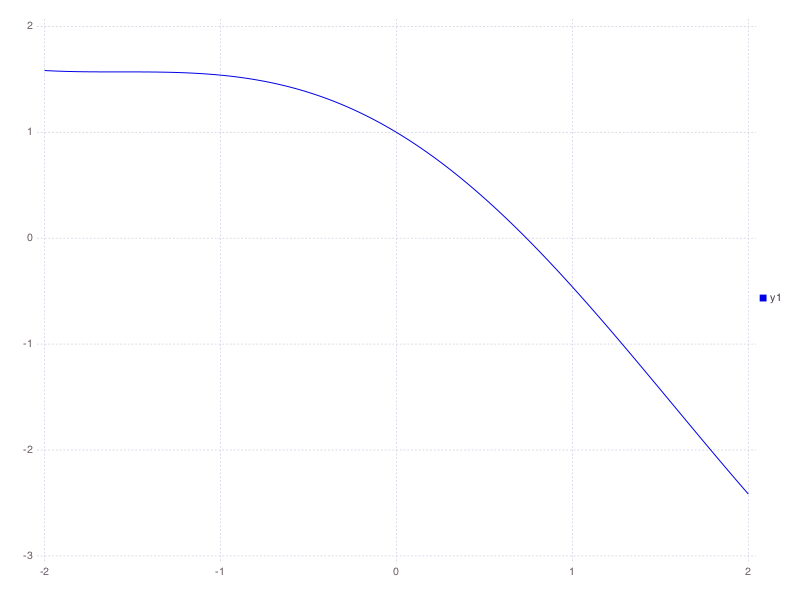

In [ ]:
f(x) = cos(x) - x
plot(f, -2,2)

<p>The basic function call specifies a bracket using vector notation:</p>

In [ ]:
x = fzero(f, [0, 1])
x, f(x)

(0.7390851332151607,0.0)

<p>For that function <code>f&#40;x&#41; &#61;&#61; 0.0</code>. Next consider &#36;f&#40;x&#41; &#61; \sin&#40;x&#41;&#36;. A known root is &#36;\pi&#36;. Basic trignometry tells us that &#36;&#91;\pi/2, 3\pi2&#93;&#36; will be a bracket:</p>

In [ ]:
f(x) = sin(x)
x = fzero(f, [pi/2, 3pi/2])
x, f(x)

(3.141592653589793,1.2246467991473532e-16)

<p>This value of <code>x</code> does not produce <code>f&#40;x&#41; &#61;&#61; 0.0</code>, however, it is as close as can be:</p>

In [ ]:
f(prevfloat(x)) * f(x) < 0.0 || f(x) * f(nextfloat(x)) < 0.0

true

<p>That is at <code>x</code> the function is changing sign.</p>

<p>The basic algorithm used for bracketing when the values are simple floating point values is the bisection method. Though there are algorithms that mathematically should converge faster &#40;and one is used for the case where <code>BigFloat</code> numbers are used&#41; by exploiting floating point computations this algorithm uses fewer function calls and runs faster.</p>

<h2>Using an initial guess</h2>

<p>If a bracket is not known, but a good initial guess is, the <code>fzero</code> function provides an interface to some different algorithms. The basic algorithm is modeled after an algorithm used for <a href="http://www.hpl.hp.com/hpjournal/pdfs/IssuePDFs/1979-12.pdf">HP-34 calculators</a>. This algorithm is much more robust to the quality of the initial guess and does not rely on tolerances for a stopping rule. In many cases it satisfies the criteria for a bracketing solution.</p>

<p>For example, we have:</p>

In [ ]:
f(x) = cos(x) - x
x = fzero(f , 1)
x, f(x)

(0.7390851332151607,0.0)

<p>And </p>

In [ ]:
f(x) = x^3 - 2x - 5
x = fzero(f, 2)
x, f(x), f(prevfloat(x)) * f(nextfloat(x))

(2.0945514815423265,-8.881784197001252e-16,-2.524354896707238e-29)

<p>For even more precision, <code>BigFloat</code> numbers can be used</p>

In [ ]:
x = fzero(sin, big(3))
x, f(x), x - pi

(3.141592653589793238462643383279503027458928160728751989361348208457812241803072,1.972309137312023369855102830054239338911808658100138722227535611337779564923164e+01,1.432617587613536461683864036161499958355168739140227720938615263585174704284396e-34)

<h3>Higher order methods</h3>

<p>The default call to <code>fzero</code> uses a second order method at best and then bracketing, which involves potentially many more function calls. For some functions, a higher-order method might be better suited. There are algorithms of order 1 &#40;secant method&#41;, 2 &#40;<a href="http://en.wikipedia.org/wiki/Steffensen&#39;s_method">Steffensen</a>&#41;, 5, 8, and 16. The order 2 method is generally more efficient, but is more sensitive to the initial guess than, say, the order 8 method. These algorithms are accessed by specifying a value for the <code>order</code> argument:</p>

In [ ]:
f(x) = 2x - exp(-x)
x = fzero(f, 1, order=2)
x, f(x)

(0.35173371124919584,0.0)

In [ ]:
f(x) = (x + 3) * (x - 1)^2
x = fzero(f, -2, order=5)
x, f(x)

(-3.0,0.0)

In [ ]:
x = fzero(f, 2, order=8)
x, f(x)

(1.0000000195707177,1.5320519747160834e-15)

<p>The latter shows that zeros need not be simple zeros &#40;i.e. &#36;f&#39;&#40;x&#41; &#61; 0&#36;, if defined&#41; to be found. For the higher-order methods, there is a tolerance that can be specified so that a value is returned as a zero if <code>abs&#40;f&#40;x&#41;&#41; &lt; tol</code>. The default method for <code>fzero</code> uses a very strict tolerance for this, otherwise defaulting to an error that at times might be very close to the actual zero. For this problem it finds the exact value:</p>

In [ ]:
x = fzero(f, 2)
x, f(x)

(1.0000000320628983,4.11211783186984e-15)

<p>But not for a similar problem:</p>

In [ ]:
fzero(x -> x^6, 1)

0.003397791170761169

<p>&#40;Though the answer is basically on track, the algorithm takes too long to improve itself to the very stringent range set. For problems where a bracket is found, this dithering won&#39;t happen.&#41;</p>

<p>The higher-order methods are basically various derivative-free versions of Newtons method which has update step &#36;x - f&#40;x&#41;/f&#39;&#40;x&#41;&#36;. For example, Steffensen&#39;s method is essentially replacing &#36;f&#39;&#40;x&#41;&#36; with &#36;&#40;f&#40;x &#43; f&#40;x&#41;&#41; - f&#40;x&#41;&#41;/f&#40;x&#41;&#36;. This is just a forward-difference approximation to the derivative with &quot;&#36;h&#36;&quot; being &#36;f&#40;x&#41;&#36;, which presumably is close to &#36;0&#36; already. The methods with higher order combine this with different secant line approaches that minimize the number of function calls. The default method uses a combination of Steffensen&#39;s method with modifications, a quadratic fit, and, if possible, a bracketing approach. It may need many more function calls than the higher-order methods. These higher-order methods can be susceptible to some of the usual issues found with Newton&#39;s method: poor initial guess, small first derivative, or large second derivative near the zero.</p>

<p>For a classic example where basically the large second derivative is the issue, we have &#36;f&#40;x&#41; &#61; x^&#123;1/3&#125;&#36;:</p>

In [ ]:
f(x) = cbrt(x)
x = fzero(f, 1, order=8)	# all of 2, 5, 8, and 16 fail

Roots.ConvergenceFailed("Failed to converge in 13 steps. Attempted division by 0. Last value was 3.8743071591115165e8.")


<p>However, the default finds the root here</p>

In [ ]:
x = fzero(f, 1)
x,  f(x)

(0.0,0.0)

<p>Finally, we show another example illustrating that the default <code>fzero</code> call is more forgiving to an initial guess. The devilish function defined below comes from a <a href="http://people.sc.fsu.edu/~jburkardt/cpp_src/test_zero/test_zero.html">test suite</a> of difficult functions. The default method finds the zero:</p>

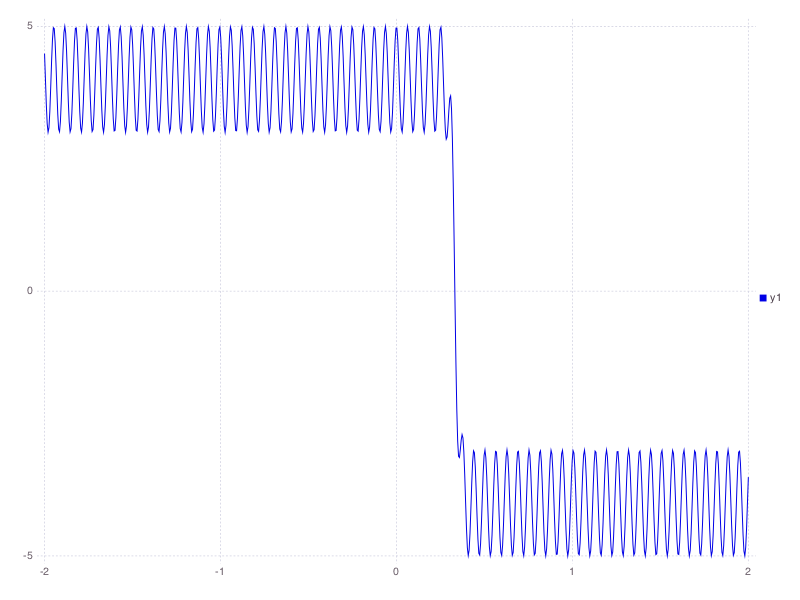

In [ ]:
f(x) = cos(100*x)-4*erf(30*x-10)
plot(f, -2, 2)

In [ ]:
fzero(f, 1)

0.33186603357456257

<p>Whereas, with <code>order&#61;n</code> methods fail. For example,</p>

In [ ]:
fzero(f, 1, order=8)

Roots.ConvergenceFailed("Failed to converge in 30 steps. Last value was -2816.8439033521086.")


<p>Basically the high order oscillation can send the proxy tangent line off in nearly random directions.</p>

<h2>Polynomials</h2>

<p>The <code>Polynomials</code> package provides a type for working with polynomial functions that allows many typical polynomial operations to be defined. In this context, the <code>roots</code> function is used to find the roots of a polynomial.</p>

<p>For example, </p>

In [ ]:
using Polynomials
x = poly([0.0])			# (x - 0.0)
roots((x-1)*(x-2)*(x-3))

3-element Array{Float64,1}:
 1.0
 2.0
 3.0

<p>As a convenience, this package adds a function interface to <code>roots</code>:</p>

In [ ]:
f(x) = (x-1)*(x-2)*(x^2 + x + 1)
roots(f)

4-element Array{Complex{Float64},1}:
 -0.5+0.866025im
 -0.5-0.866025im
  1.0+0.0im     
  2.0+0.0im     

<p>The <code>fzeros</code> function will find the real roots of a univariate polynomial:</p>

In [ ]:
fzeros( (x-1)*(x-2)*(x^2 + x + 1))

2-element Array{Any,1}:
 1//1
  2.0

<p>As with roots, this function be called with a function:</p>

In [ ]:
f(x) = x*(x-1)*(x^2 + 1)^4
fzeros(f)

2-element Array{Any,1}:
  0  
 1//1

<p>The algorithm can have numeric issues when the polynomial degree gets too large, or the roots are too close together.</p>

<p>The <code>multroot</code> function will also find the roots. The algorithm does a better job when there are multiple roots, as it implements an algorithm that first identifies the multiplicity structure of the roots, and then tries to improve these values.</p>

In [ ]:
multroot((x-1)*(x-2)*(x-3))	# roots, multiplicity

([0.9999999999999976,2.0000000000000067,2.9999999999999964],[1,1,1])

<p>The <code>factor</code> function provides a more pleasant output.</p>

<p>The <code>roots</code> function degrades as there are multiplicities:</p>

In [ ]:
p = (x-1)^2*(x-2)^3*(x-3)^4
roots(p)

9-element Array{Complex{Float64},1}:
 0.999999+0.0im        
      1.0+0.0im        
  1.99954+0.0im        
  2.00023+0.000398985im
  2.00023-0.000398985im
  2.99787+0.00213481im 
  2.99787-0.00213481im 
  3.00213+0.00212188im 
  3.00213-0.00212188im 

<p>Whereas, <code>multroot</code> gets it right.</p>

In [ ]:
factor(p)

Dict{Number,Int64} with 3 entries:
  2.9999999999999996 => 4
  2.000000000000001  => 3
  0.9999999999999997 => 2

<p>The difference gets dramatic when the multiplicities get quite large.</p>

<h2>Classical methods</h2>

<p>The package provides some classical methods for root finding: <code>newton</code>, <code>halley</code>, and <code>secant_method</code>. We can see how each works on a problem studied by Newton himself. Newton&#39;s method uses the function and its derivative:</p>

In [ ]:
f(x) = x^3 - 2x - 5
fp(x) = 3x^2 - 2
x = newton(f, fp, 2)
x, f(x), f(prevfloat(x)) * f(nextfloat(x))

(2.0945514815423265,-8.881784197001252e-16,-2.524354896707238e-29)

<p>To see the algorithm in progress, the argument <code>verbose&#61;true</code> may be specified. </p>

<p>The secant method needs two starting points, here we start with 2 and 3:</p>

In [ ]:
x = secant_method(f, 2,3)
x, f(x), f(prevfloat(x)) * f(nextfloat(x))

(2.094551481542327,3.552713678800501e-15,-8.67746995743113e-30)

<p>Halley&#39;s method has cubic convergence, as compared to Newton&#39;s quadratic convergence. It uses the second derivative as well:</p>

In [ ]:
fpp(x) = 6x
x = halley(f, fp, fpp, 2)
x, f(x), f(prevfloat(x)) * f(nextfloat(x))

(2.0945514815423265,-8.881784197001252e-16,-2.524354896707238e-29)

<p>For many function, the derivatives can be computed automatically. The <code>ForwardDiff</code> package provides a means. This package wraps the process into an operator, <code>D</code> which returns the derivative of a function <code>f</code> &#40;for simple-enough functions&#41;:</p>

In [ ]:
newton(f, D(f), 2)

2.0945514815423265

<p>Or for Halley&#39;s method</p>

In [ ]:
halley(f, D(f), D(f,2), 2)

2.0945514815423265

<p>&#40;The operator <code>D2&#40;f&#41;</code> is a convenience for <code>D&#40;f,2&#41;</code>.&#41; Specifying the derivative&#40;s&#41; can be skipped, the functions will default to the above calls.</p>

<h2>Finding critical points</h2>

<p>The <code>D</code> function makes it straightforward to find critical points &#40;where the derivative is &#36;0&#36; or undefined&#41;. For example, the critical point of the function &#36;f&#40;x&#41; &#61; 1/x^2 &#43; x^3, x &gt; 0&#36; can be found with:</p>

In [ ]:
f(x) = 1/x^2 + x^3
fzero(D(f), 1)

0.9221079114817278

<p>For more complicated expressions, <code>D</code> will not work. In this example, we have a function &#36;f&#40;x, \theta&#41;&#36; that models the flight of an arrow on a windy day:</p>

In [ ]:
function flight(x, theta)
 	 k = 1/2
	 a = 200*cosd(theta)
	 b = 32/k
	 tand(theta)*x + (b/a)*x - b*log(a/(a-x))
end

flight (generic function with 1 method)

<p>The total distance flown is when <code>flight&#40;x&#41; &#61;&#61; 0.0</code> for some <code>x &gt; 0</code>: This can be solved for different <code>theta</code> with <code>fzero</code>. In the following, we note that <code>log&#40;a/&#40;a-x&#41;&#41;</code> will have an asymptote at <code>a</code>, so we start our search at <code>a-1</code>:</p>

In [ ]:
function howfar(theta)
	 a = 200*cosd(theta)
	 fzero(x -> flight(x, theta), a-1)
end

howfar (generic function with 1 method)

<p>To see the trajectory if shot at 30 degrees, we have:</p>

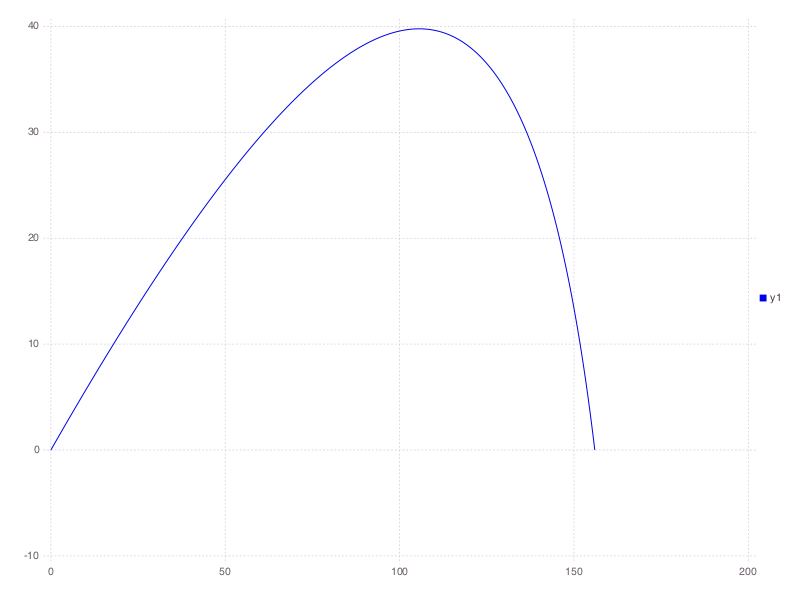

In [ ]:
theta = 30
plot(x -> flight(x,  theta), 0, howfar(theta))

<p>To maximize the range we solve for the lone critical point of <code>howfar</code> within the range. The derivative can not be taken automatically with <code>D</code>. So,  here we use a central-difference approximation and start the search at 45 degrees, the angle which maximizes the trajectory on a non-windy day:</p>

In [ ]:
h = 1e-5
howfarp(theta) = (howfar(theta+h) - howfar(theta-h)) / (2h)
fzero(howfarp, 45)

26.262308924144275